<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа №4

# Виды распределений

# Задание 1
Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [35]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

import statistics
from scipy.stats import pearsonr
import random
%matplotlib inline


Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [22]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url='http://yustiks.ru/dataset/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(url,  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



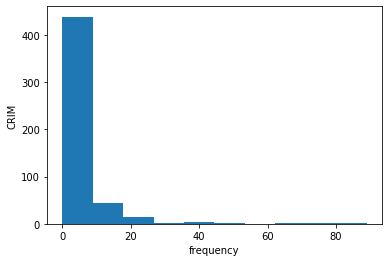

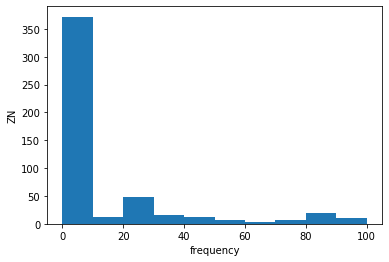

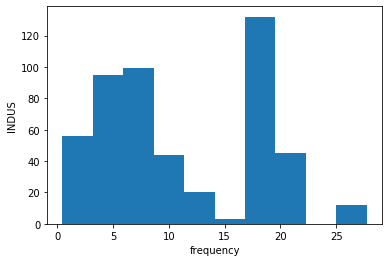

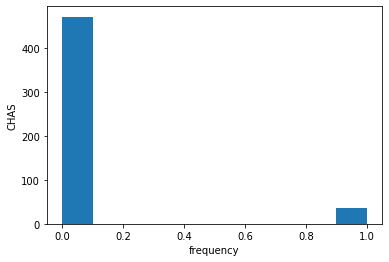

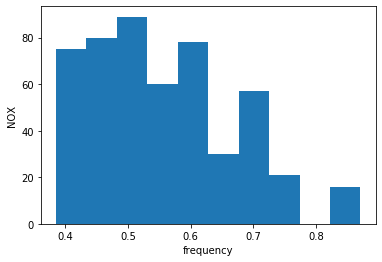

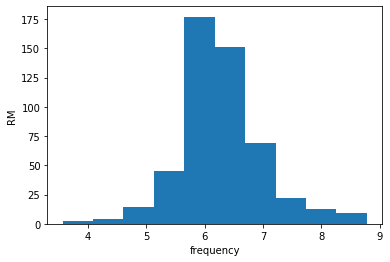

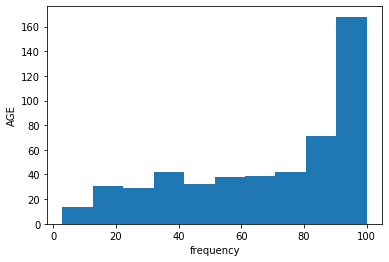

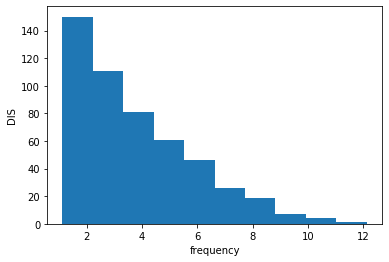

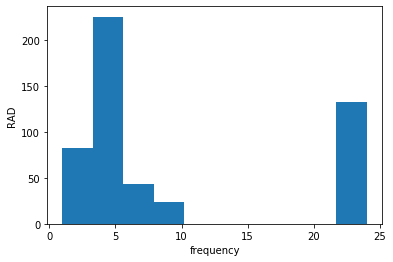

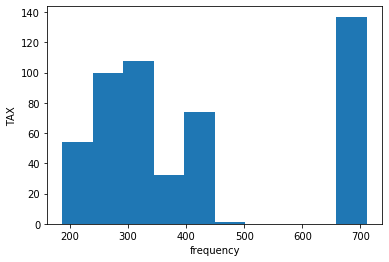

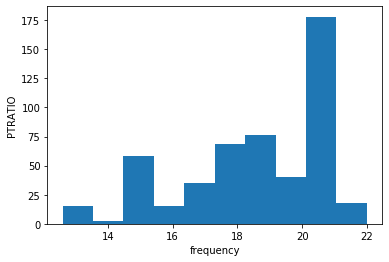

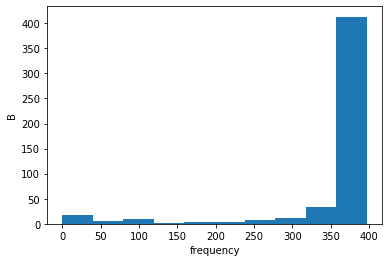

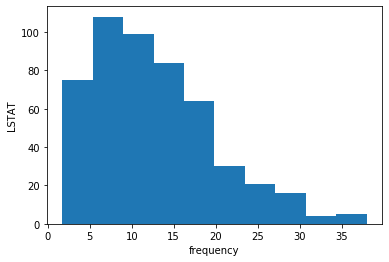

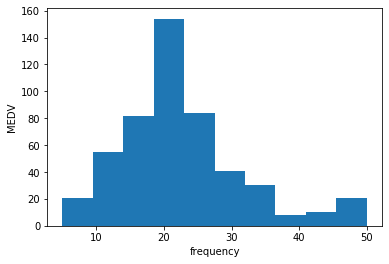

In [25]:
#Гистограммы для всех значений
for i in names:
    plt.hist(data[i])
    plt.xlabel('frequency')
    plt.ylabel(i)
    plt.show()

### Гипотезы по названию распределений

Нормальное - RM = среднее распределение комнат на жилище

Равномерное - не найдено,

Биноминальное - возможно AGE, проблематика правых распределений вообще не освещена или мы так и не познали ключевые слова

Бернулли - CHAS - фиктивная переменная широкоизвестного в узких кругах Чарльз-Ривера

Геометрическое - DIS

Логнормальное - CRIM и ZN


странные распределения - остальные

Построить матрицу корреляций для данной таблицы и выбрать максимально коррелирующий атрибут (несколько атрибутов) с ценой на дома (MEDV атрибут).

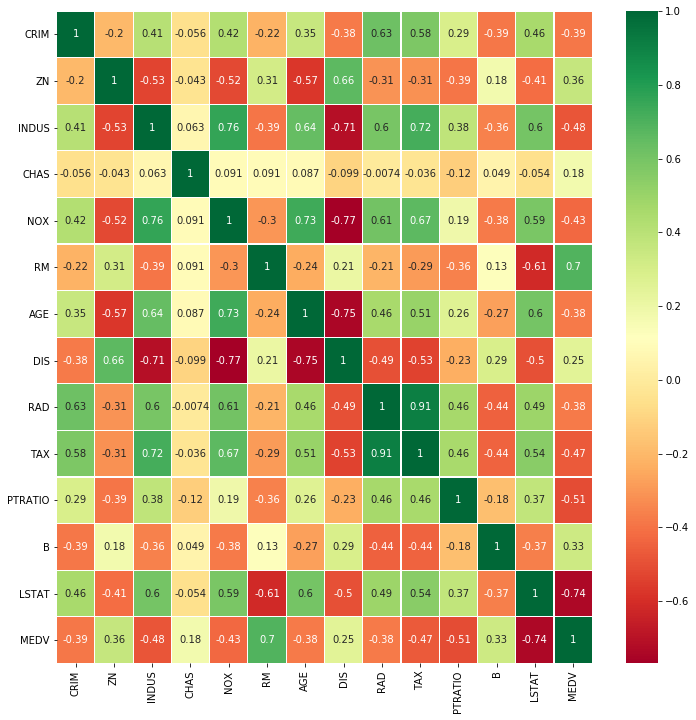

In [28]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

#условно прямая зависимость цены дома от количества комнат (RM) и обратная от степени падения нравов соседей (LSTAT)

Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 


1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии

In [47]:
# преобразование в numpy массив
medv = np.array(data['MEDV']).reshape(-1,1)
lstat = np.array(data['LSTAT']).reshape(-1,1)

# недостающий импорт и прочие священнодействия
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

model = LinearRegression()

#деление выборки на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(
    medv,
    lstat,
    test_size = 0.2
)
#обучение модели с помощью фит метода
model.fit(X_train, y_train)
#предсказание модели и ошибки
predicted_y = model.predict(X_test)
print('квадратичная ошибка', mean_squared_error(predicted_y, y_test))
print('абсолютная ошибка',mean_absolute_error(predicted_y, y_test))


квадратичная ошибка 31.64724802203745
абсолютная ошибка 4.282250626901973


array([25.15204513])

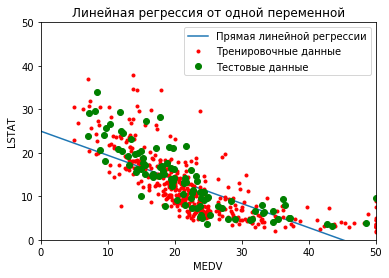

In [45]:
#точечный график 
plt.xlabel('MEDV')
plt.ylabel('LSTAT')
plt.title('Линейная регрессия от одной переменной')
# Построим прямую для регрессии
# Создадим 100 точек для предсказаний
x = np.linspace(0, 80, 150)
# Посчитаем предсказанные значения
# y = kx + b
# k = model.coef_
# b = model.intercept_
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.xlim(0,50)
plt.ylim(0,50)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

# Заметки КО - не линейная зависимость между ценой дома и количеством рядом живущих маргиналов. Но если деклассированных элементов меньше 10 условных единиц то они оказывают слабое влияние на цену дома. 

# Задание 2
Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [67]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head(5)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop).

In [68]:
#список названий столбцов
names = data.columns.values.tolist()
m = []
#проверка отсутствующих значений 
for i in names:
    m.append(data[i].isnull().sum())

print(data.shape[0], m) #в коррупции значений больше всего отсутствует, странно

156 [0, 0, 0, 1, 1, 1, 1, 8, 1, 4, 6]


In [69]:
# удаляем лишнее
for i in names:
    data = data.dropna(subset=[i])
print(data.shape[0]) # выбыло 16 строк

140


Сколько стран в выборке? Написать ответ. 

In [64]:
country = data['Country (region)']
print('Количество стран в репорте: ', data.shape[0])
print('Количество уникальных значений в столбце стран: ', len(country.unique()))

#все страны уникальны

Количество стран в репорте:  140
Количество уникальных значений в столбце стран:  140


Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

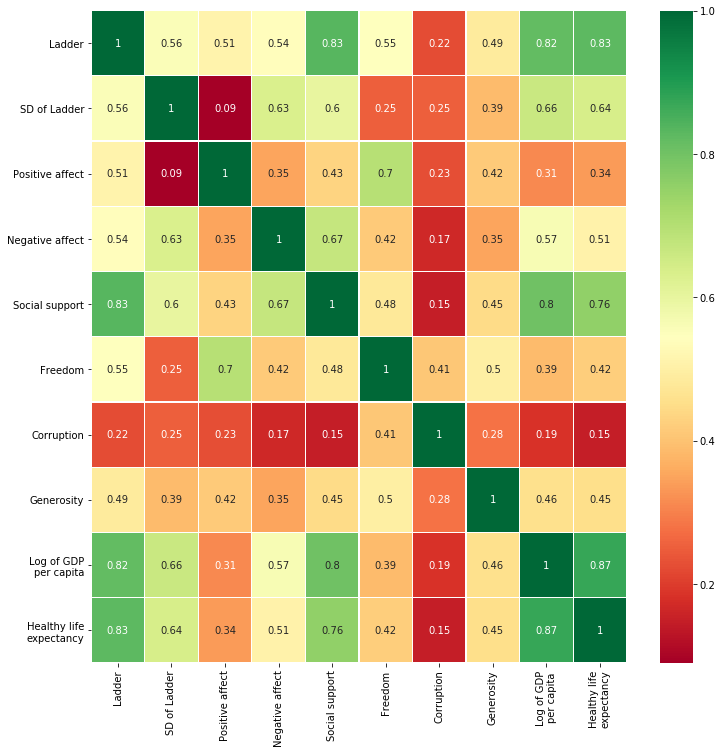

In [70]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

### выводы
0. Социология странная наука, половина понятий вообще не понятна, но подозревается что о них знает каждый образованный человек. К сожалению это не я.
1. у лестницы почти линейная взаимосвязь с логарифмом ВВП на душу населения, социальной поддержкой и здоровой жизнью. 
2. У коррупции со всеми положительными данными из п.1 обратная корелляция. 
3. На сайте объекта, даже если бы не было языковых затыков, тоже можно сломать глаз и мозг. Что возвращает нас к нулевому пункту. Социологи - странные.  

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

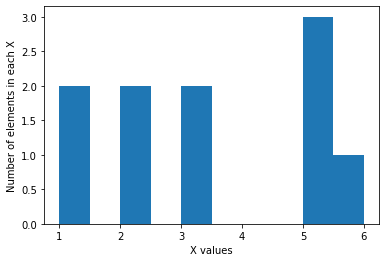

In [12]:
trials = 10
values = np.random.randint(1, 7, size=trials)

plt.hist(values)
plt.xlabel('X values')
plt.ylabel('Number of elements in each X')
plt.show()
# распределение в высшей степени случайное, неравномерное, любое

Смоделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

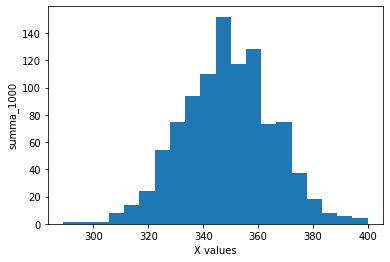

In [21]:
times = 1000 #число раз
trials = 100 # число подбрасываний
sum_trials = [sum(np.random.randint(1, 7, size=trials)) for j in range(times)]

plt.hist(sum_trials, 20)
plt.xlabel('X values')
plt.ylabel('summa_1000')
plt.show()   
# распределение более-менее нормальное, видимо независимых испытаний 1000 вероятно достаточно для получения распределения, близкого к нормальному. Больше - лучше   

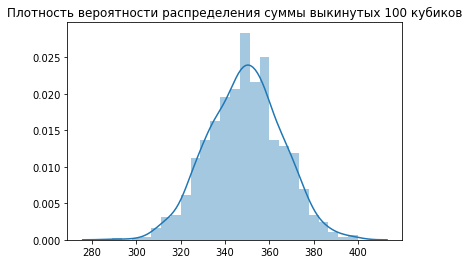

In [49]:
sns.distplot(sum_trials)
plt.title('Плотность вероятности распределения суммы выкинутых 100 кубиков')
plt.show()